# 1. Importing Necessary Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, TimeDistributed, Flatten, Dense
from random import seed
seed(10)
from tensorflow.random import set_seed
set_seed(10)
from keras.preprocessing.sequence import pad_sequences


# 2. Importing data

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
data = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

In [4]:
type (data)

numpy.ndarray

# 3. Pad each sentence to be of same length (300)


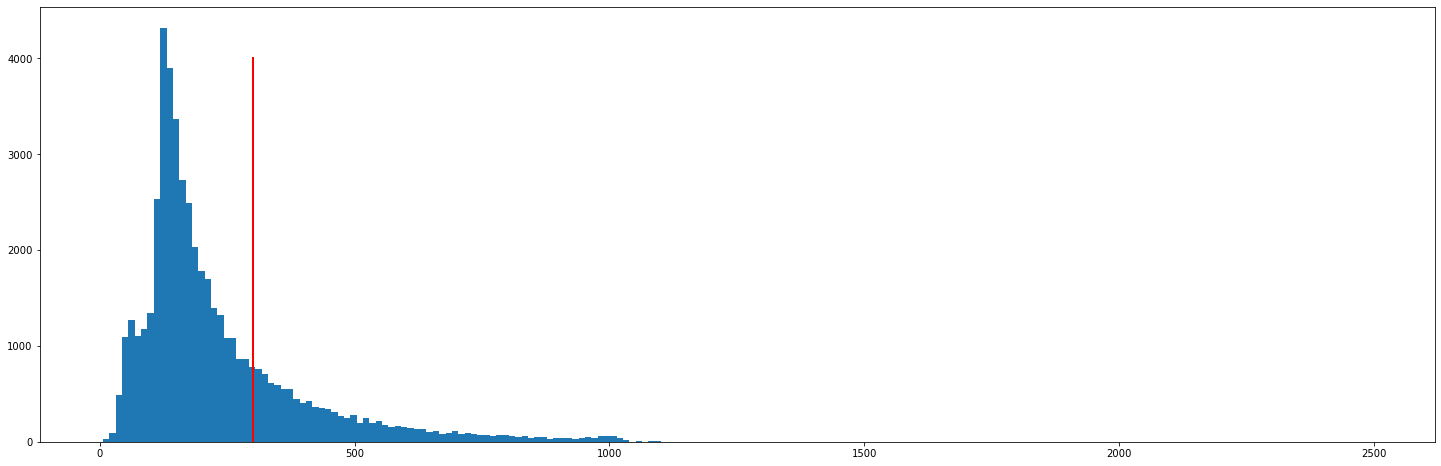

Average review length: 234.75892
Standard deviation: 173
No of reviews with length below 300: 38583


In [5]:
length = [len(i) for i in data]
plt.figure(figsize=(25,8))
plt.hist(length, bins= 200)
plt.plot([300, 300], [0, 4000], 'r', linewidth=2.0)
plt.show()
print("Average review length: {}".format(np.mean(length)))
print("Standard deviation: {}".format(round(np.std(length))))
print("No of reviews with length below 300: {}".format(sum(i < 301 for i in length)))

In [6]:
data_padded = pad_sequences(data, padding='post', maxlen=300)

In [7]:
print ('Number of reviews :',data_padded.shape[0])

Number of reviews : 50000


In [8]:
print ('Number of words in each review:',data_padded.shape[1])

Number of words in each review: 300


In [9]:
print ('Number of labels:', labels.shape[0])

Number of labels: 50000


In [10]:
data_padded[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [11]:
labels[0]

1

## Decoding the feature value to get original sentence


In [12]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


In [13]:
print(" ".join([reverse_word_index.get(n-3, '#') for n in data_padded[1]]))


# big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal # the hair is big lots of boobs # men wear those cut # shirts that show off their # sickening that men actually wore them and the music is just # trash that plays over and over again in almost every scene there is trashy music boobs and # taking away bodies and the gym still doesn't close for # all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

## Sentiment is labeled as 
### Positive = 1
### Negative = 0

In [14]:
labels[1]

0

#### Hence the above review is labeled as a Negative review. 

In [15]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(data_padded, labels, test_size=0.20, random_state=0)


# Creating Model 

In [16]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=300))
model.add(LSTM(units=100, return_sequences=True, dropout=0.2))
model.add(TimeDistributed(Dense(100)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compiling the Model

In [17]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [18]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 300, 100)          80400     
                                                                 
 time_distributed (TimeDistr  (None, 300, 100)         10100     
 ibuted)                                                         
                                                                 
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 30001     
                                                                 
Total params: 1,120,501
Trainable params: 1,120,501
Non-trainable params: 0
______________________________________________

# Fitting the model

In [19]:
history = model.fit(train_X, np.array(train_y), batch_size=300, epochs=3, validation_split=0.1, verbose=1)


Epoch 1/3
120/120 [==============================] - 332s 3s/step - loss: 0.4030 - accuracy: 0.7987 - val_loss: 0.2954 - val_accuracy: 0.8730
Epoch 2/3
120/120 [==============================] - 335s 3s/step - loss: 0.2248 - accuracy: 0.9106 - val_loss: 0.2741 - val_accuracy: 0.8855
Epoch 3/3
120/120 [==============================] - 319s 3s/step - loss: 0.1828 - accuracy: 0.9296 - val_loss: 0.2975 - val_accuracy: 0.8838


# Evaluating the model

In [20]:
results = model.evaluate(test_X, test_y)


313/313 [==============================] - 28s 88ms/step - loss: 0.2951 - accuracy: 0.8888


In [21]:
from sklearn.metrics import confusion_matrix
predict_y = (model.predict(test_X) > 0.5).astype("int32").flatten()
confusion_matrix(test_y, predict_y)

array([[4455,  538],
       [ 574, 4433]])

In [22]:
print('Prediction: {} | Ground Truth: {}'.format(((model.predict(test_X[0].reshape(-1,300)) > 0.5).astype("int32").flatten()), test_y[0]))


Prediction: [1] | Ground Truth: 1


# PART 2

## IMPORTING NECESSARY LIBRARIES


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
%matplotlib inline
import os
import re
# print(os.listdir("../input"))
import tensorflow as tf

### Importing Dataset

In [24]:
import json

def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data = list(parse_data('/Users/Chopra/Documents/GL/Sarcasm_Headlines_Dataset.json'))

In [25]:
import json

def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data2 = list(parse_data('/Users/Chopra/Documents/GL/Sarcasm_Headlines_Dataset_v2.json'))


### Creating dataframes of Dataset

In [26]:
df=pd.DataFrame(data)
df2=pd.DataFrame(data2)

In [27]:
df = df[['headline','is_sarcastic']]
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [28]:
df2 = df2[['headline','is_sarcastic']]
df2.head()


,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep. totally nails why congress is falling...,0
2,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting t...,1
4,mother comes pretty close to using word 'strea...,1


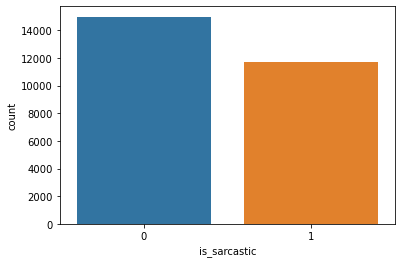

In [29]:
ax = sns.countplot(x="is_sarcastic", data=df)


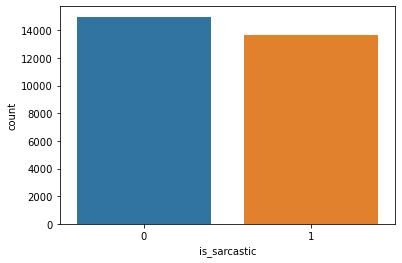

In [30]:
ax = sns.countplot(x="is_sarcastic", data=df2)

#### Making changes to the data, lower casing and spacing

In [31]:
df['headline'] = df['headline'].apply(lambda x: x.lower())
df['headline'] = df['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [32]:
df['headline']

0        former versace store clerk sues over secret bl...
1        the roseanne revival catches up to our thorny ...
2        mom starting to fear sons web series closest t...
3        boehner just wants wife to listen not come up ...
4        jk rowling wishes snape happy birthday in the ...
                               ...                        
26704                  american politics in moral freefall
26705                               americas best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object

In [33]:
df2['headline'] = df2['headline'].apply(lambda x: x.lower())
df2['headline'] = df2['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [34]:
vocab_size = 10000
embedding_dim = 16
max_length = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df2['headline'])
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(df2['headline'])
training_padded = pad_sequences(training_sequences,maxlen=max_length, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(df['headline'])
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding='post', truncating='post')

In [35]:
training_padded


array([[   1,  337, 3106, ...,    0,    0,    0],
       [7348, 1732,  733, ...,    0,    0,    0],
       [ 893,   35,    1, ...,    0,    0,    0],
       ...,
       [   4,   97,  590, ...,    0,    0,    0],
       [1830, 1284, 3255, ...,    0,    0,    0],
       [ 210, 3224,   21, ...,    0,    0,    0]], dtype=int32)

In [36]:
training_padded = np.array(training_padded)
training_labels = np.array(df2['is_sarcastic'])
testing_padded = np.array(testing_padded)
testing_labels = np.array(df['is_sarcastic'])

### Defining, compiling and running the MODEL

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(training_padded, training_labels, epochs=30, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
895/895 - 72s - loss: 0.3913 - accuracy: 0.8191 - val_loss: 0.2230 - val_accuracy: 0.9215 - 72s/epoch - 80ms/step
Epoch 2/30
895/895 - 65s - loss: 0.2389 - accuracy: 0.9042 - val_loss: 0.1497 - val_accuracy: 0.9492 - 65s/epoch - 72ms/step
Epoch 3/30
895/895 - 65s - loss: 0.1658 - accuracy: 0.9363 - val_loss: 0.1000 - val_accuracy: 0.9694 - 65s/epoch - 73ms/step
Epoch 4/30
895/895 - 67s - loss: 0.1196 - accuracy: 0.9568 - val_loss: 0.0710 - val_accuracy: 0.9799 - 67s/epoch - 75ms/step
Epoch 5/30
895/895 - 67s - loss: 0.0875 - accuracy: 0.9687 - val_loss: 0.0537 - val_accuracy: 0.9856 - 67s/epoch - 75ms/step
Epoch 6/30
895/895 - 65s - loss: 0.0698 - accuracy: 0.9765 - val_loss: 0.0426 - val_accuracy: 0.9888 - 65s/epoch - 72ms/step
Epoch 7/30
895/895 - 64s - loss: 0.0498 - accuracy: 0.9834 - val_loss: 0.0281 - val_accuracy: 0.9922 - 64s/epoch - 71ms/step
Epoch 8/30
895/895 - 65s - loss: 0.0347 - accuracy: 0.9888 - val_loss: 0.0197 - val_accuracy: 0.9950 - 65s/epoch - 72ms/step


In [38]:
score,acc=model.evaluate(testing_padded,testing_labels)


835/835 [==============================] - 12s 15ms/step - loss: 5.8953e-04 - accuracy: 0.9999


In [39]:
acc,score


(0.9998502135276794, 0.0005895327776670456)